# Import Libraries

In [2]:
# LLM server library
import ollama
# Custom utility functions
from utils import read_data, plot_umap
# Data analysis libraries
import pandas as pd
import numpy as np
import umap
# Machine learning preprocessing
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
# Machine learning models
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
import lightgbm as lgb
# Machine learning evaluation metrics
from sklearn.metrics import (
    roc_auc_score,
    average_precision_score,
    precision_recall_curve,
    roc_curve,
    confusion_matrix,
    f1_score,
    recall_score,
    accuracy_score
)
# Machine learning pipeline
from sklearn.model_selection import StratifiedKFold
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
# Hyperparameter optimization
import optuna
# Model persistence
import joblib
# Interpretability library
from lime.lime_text import LimeTextExplainer
# Supress warnings
import warnings
warnings.filterwarnings("ignore")

# Exploratory Data Analysis

In [3]:
# Read image data
data = read_data('data/image/qc_results.json')

In [4]:
# Create pandas DataFrame for data analysis
df = pd.DataFrame(data)
df

,jobId,createdAt,status,modelTitle,modelId,modelMetadata,prompt,images,outputImage,qaScore,qaTransformedScore,qaReasoning,qaActionableFeedback
0,e268c427-dc7d-4f82-a1fa-14268f374460,{'$date': '2025-09-05T11:30:06.652Z'},completed,Nano Banana,i2i-nanoBanana,{'replicatePredictionURL': 'https://api.replic...,Add a reference image 1 character in the input...,"[None, https://renderboard-test.s3.us-east-005...",https://renderboard-test.s3.us-east-005.backbl...,3,2,The generated image fails to add the character...,Characters - The black cat from reference imag...
1,554d9939-e4cb-41f7-9bbf-98327bb8415b,{'$date': '2025-09-05T11:25:38.848Z'},completed,Character Image OpenAI,t2i-gpt-image-1,{'openAIModelId': 'gpt-image-1'},Full-body image of a character. \nPriya is Pri...,[None],https://renderboard-test.s3.us-east-005.backbl...,NaN,NaN,NaN,NaN
2,0a8b9c31-7596-4a58-88d2-40641e50f87d,{'$date': '2025-09-05T11:23:19.319Z'},completed,Character Image OpenAI,t2i-gpt-image-1,{'openAIModelId': 'gpt-image-1'},Full-body image of a character. \nPriya is Pri...,[None],https://renderboard-test.s3.us-east-005.backbl...,NaN,NaN,NaN,NaN
3,6702d149-c2c4-4133-8b65-a9eef6449453,{'$date': '2025-09-05T11:20:00.554Z'},completed,Nano Banana,i2i-nanoBanana,{'replicatePredictionURL': 'https://api.replic...,Create a scene where reference image character...,"[None, https://renderboard-test.s3.us-east-005...",https://renderboard-test.s3.us-east-005.backbl...,9,3,The generated image fulfills the prompt well: ...,Characters - The girl's mouth expression is ne...
4,3767e33f-c637-41fe-bf4d-f0560d1c1334,{'$date': '2025-09-05T11:09:12.127Z'},completed,Shot Image OpenAI,i2i-gpt-image-1,{'openAIModelId': 'gpt-image-1'},"Vet is talking to amrita, mohini is looking at...","[None, https://renderboard-test.s3.us-east-005...",https://renderboard-test.s3.us-east-005.backbl...,9,3,The generated image matches the prompt well: t...,Characters - Amrita’s expression appears more ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8106,48cd10c3-68d6-426f-af4a-57f5b08b92cd,{'$date': '2025-02-19T22:11:06.528Z'},completed,Flux Schnell,fluxschnell,{'replicatePredictionURL': 'https://api.replic...,a apple and a banana,[None],https://renderboard-test.s3.us-east-005.backbl...,NaN,NaN,NaN,NaN
8107,747c9d30-2bf7-43de-b0cb-6925d5da41c1,{'$date': '2025-02-19T07:25:02.499Z'},completed,Flux Dev,fluxDev,{'replicatePredictionURL': 'https://api.replic...,Make input image cartooon,[None],https://renderboard-test.s3.us-east-005.backbl...,NaN,NaN,NaN,NaN
8108,bd607e0c-b9d4-4b18-bd91-23efbb9056a9,{'$date': '2025-02-19T07:24:30.997Z'},completed,Flux Dev,fluxDev,{'replicatePredictionURL': 'https://api.replic...,Make input image cartooon,[None],https://renderboard-test.s3.us-east-005.backbl...,NaN,NaN,NaN,NaN
8109,04488af6-c73a-425a-99b6-75ea4c3c2b38,{'$date': '2025-02-19T07:23:25.525Z'},completed,Flux Schnell,fluxschnell,{'replicatePredictionURL': 'https://api.replic...,Angry Puppy transparent background,[None],https://renderboard-test.s3.us-east-005.backbl...,NaN,NaN,NaN,NaN


### General Information
- Only 3023 out of 8111 entries include qaScores
- Not every entry has status `completed`
- `prompt` is missing in 10 entries
- `qaTransformedScore` contains non numeric values
- `qaScore` contains non numeric values

In [5]:
# Display DataFrame information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8111 entries, 0 to 8110
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   jobId                 8111 non-null   object
 1   createdAt             8111 non-null   object
 2   status                8111 non-null   object
 3   modelTitle            8111 non-null   object
 4   modelId               8111 non-null   object
 5   modelMetadata         7685 non-null   object
 6   prompt                8101 non-null   object
 7   images                8111 non-null   object
 8   outputImage           7948 non-null   object
 9   qaScore               3023 non-null   object
 10  qaTransformedScore    3023 non-null   object
 11  qaReasoning           3023 non-null   object
 12  qaActionableFeedback  3023 non-null   object
dtypes: object(13)
memory usage: 823.9+ KB


In [6]:
# Check the `status` column. It should justify the missing outputs.
df.status.value_counts()

status
completed     7889
failed         165
processing      53
cancelled        4
Name: count, dtype: int64

In [7]:
# Drop rows with non completed status
df = df[df.status=="completed"]
df.reset_index(drop=True, inplace=True)
print(f"Number of completed entries: {len(df)}")

Number of completed entries: 7889


In [8]:
# Drop rows with missing 'prompt'
df = df.dropna(subset=['prompt'])
df.reset_index(drop=True, inplace=True)
print(f"Number of non missing prompt entries: {len(df)}")

Number of non missing prompt entries: 7880


In [9]:
# Print qaScore and qaTransformedScore values that are not int or float
for idx, row in df.iterrows():
    if not isinstance(row.qaScore, int) and not isinstance(row.qaScore, float):
        print(f"qaScore type identified: {type(row.qaScore)} at index {idx}")
        print(f"qaScore value: {row.qaScore}\n")
    if not isinstance(row.qaTransformedScore, int) and not isinstance(row.qaTransformedScore, float):
        print(f"qaTransformedScore type identified: {type(row.qaTransformedScore)} at index {idx}")
        print(f"qaTransformedScore value: {row.qaTransformedScore}\n")

qaTransformedScore type identified: <class 'dict'> at index 2068
qaTransformedScore value: {'$numberDouble': 'NaN'}

qaScore type identified: <class 'dict'> at index 2327
qaScore value: {'$numberDouble': 'NaN'}

qaTransformedScore type identified: <class 'str'> at index 5826
qaTransformedScore value: 4



In [10]:
# Fix identified non-numeric entries
df.at[2068, 'qaTransformedScore'] = np.nan
df.at[5826, 'qaTransformedScore'] = float(df.at[5826, 'qaTransformedScore'])
df.at[2327, 'qaScore'] = np.nan

In [11]:
# Summary statistics for qaScore after cleaning
df.qaScore.astype(float).describe()

count    3022.000000
mean        8.413633
std         1.705663
min         0.000000
25%         8.000000
50%         9.000000
75%         9.000000
max        10.000000
Name: qaScore, dtype: float64

Text(0.5, 1.0, 'Distribution of qaScore')

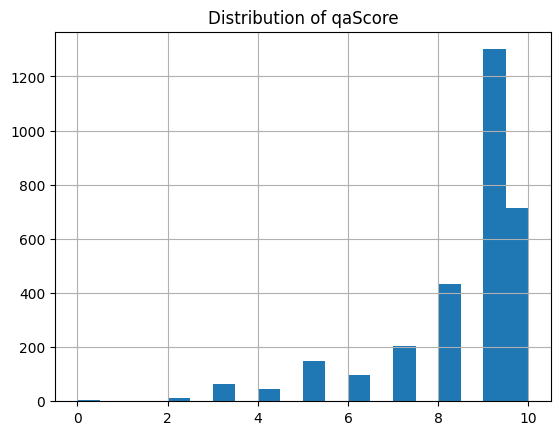

In [12]:
# Histogram of qaScore
df.qaScore.hist(bins=20)
plt.title('Distribution of qaScore')

In [13]:
# Summary statistics for qaTransformedScore after cleaning
df.qaTransformedScore.astype(float).describe()

count    3022.000000
mean        3.354401
std         0.722604
min         1.000000
25%         3.000000
50%         3.000000
75%         4.000000
max         4.000000
Name: qaTransformedScore, dtype: float64

Text(0.5, 1.0, 'Distribution of qaTransformedScore')

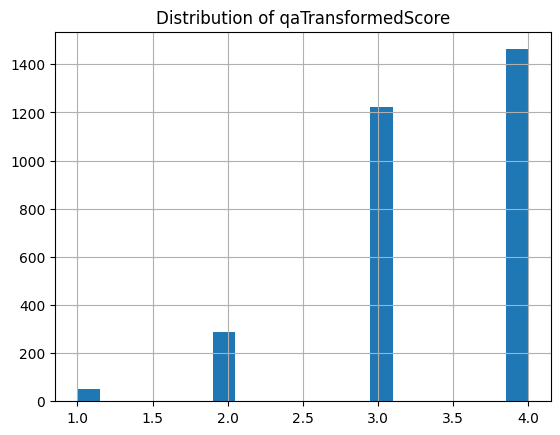

In [14]:
# Histogram of qaTransformedScore
df.qaTransformedScore.hist(bins=20)
plt.title('Distribution of qaTransformedScore')

In [15]:
# Correlation between qaScore and qaTransformedScore
df[['qaScore', 'qaTransformedScore']].corr()

,qaScore,qaTransformedScore
qaScore,1.000000,0.843834
qaTransformedScore,0.843834,1.000000


In [16]:
# Distribution of modelId for low qaScore (<=5)
df[df.qaScore<=5]["modelId"].value_counts()

modelId
i2i-gpt-image-1    163
fluxKontextPro      57
i2i-nanoBanana      36
fluxschnell          9
fluxDev              6
t2i-gpt-image-1      4
imagegen4fast        2
Name: count, dtype: int64

In [17]:
# Distribution of modelId for high qaScore (>5)
df[df.qaScore>5]["modelId"].value_counts()

modelId
i2i-gpt-image-1    2452
t2i-gpt-image-1     120
fluxKontextPro       87
i2i-nanoBanana       43
imagegen4fast        18
t2i-nanoBanana       11
fluxschnell          10
fluxDev               4
Name: count, dtype: int64

In [18]:
# Distribution of modelId for low qaTransformedScore (<=2)
df[df.qaTransformedScore<=2]["modelId"].value_counts()

modelId
i2i-gpt-image-1    212
fluxKontextPro      67
i2i-nanoBanana      36
fluxschnell          9
t2i-gpt-image-1      7
fluxDev              5
imagegen4fast        3
Name: count, dtype: int64

In [19]:
# General info about prompts with non-missing qaScore. Duplicate prompts.
df[df.qaScore.notna()]["prompt"].describe()

count                                                  3022
unique                                                 2585
top       Regenerate this scene in a vertical format whi...
freq                                                     14
Name: prompt, dtype: object

In [20]:
# Distribution of qaScore for prompts starting with "Regenerate"
df[df.prompt.str.startswith("Regenerate")]["qaScore"].astype(float).describe()

count    43.000000
mean      6.488372
std       2.520129
min       3.000000
25%       4.500000
50%       8.000000
75%       9.000000
max      10.000000
Name: qaScore, dtype: float64

Text(0.5, 1.0, 'Distribution of qaScore for Regenerate prompts')

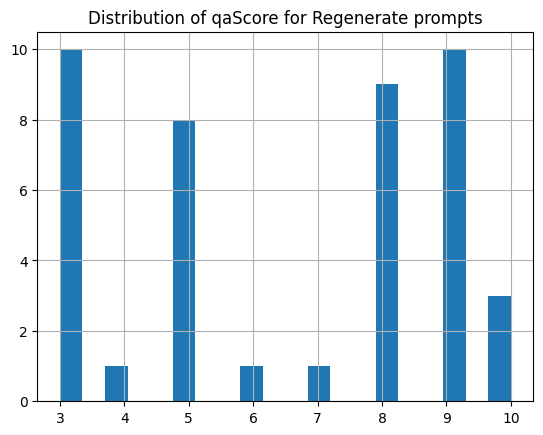

In [21]:
# Histogram of qaScore for prompts starting with "Regenerate"
df[df.prompt.str.startswith("Regenerate")]["qaScore"].hist(bins=20)
plt.title('Distribution of qaScore for Regenerate prompts')

In [22]:
# Work with non-missing qaScore and qaTransformedScore entries and drop duplicates according to prompt and modelId
workdf = df[df.qaScore.notna() & df.qaTransformedScore.notna()].drop_duplicates(subset=["prompt", "modelId"]).copy()

In [23]:
# Create number of characters feature
workdf['prompt_length'] = workdf['prompt'].apply(lambda x: len(x))

In [24]:
# Correlation between prompt_length and qaScore
workdf[['prompt_length', 'qaScore']].corr()

,prompt_length,qaScore
prompt_length,1.000000,0.202188
qaScore,0.202188,1.000000


Text(0.5, 1.0, 'Distribution of prompt_length (number of characters)')

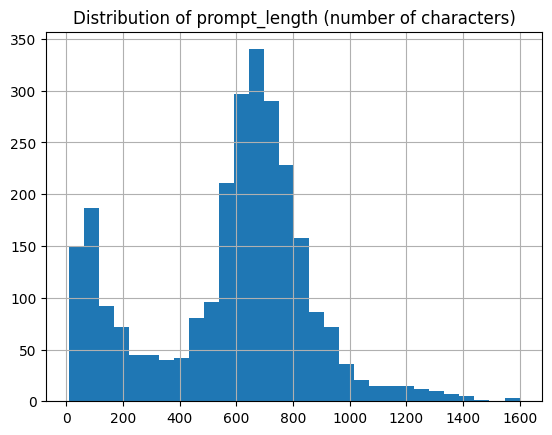

In [25]:
# Histogram of prompt_length
workdf['prompt_length'].hist(bins=30)
plt.title('Distribution of prompt_length (number of characters)')

In [26]:
# Create bins for prompt_length
workdf['prompt_length_bin'] = pd.cut(
    workdf['prompt_length'],
    bins=[0, 500, 1000, np.inf],
    labels=['<500', '500-1000', '>1000']
)

Text(0.5, 1.0, 'Distribution of qaTransformedScore between different models')

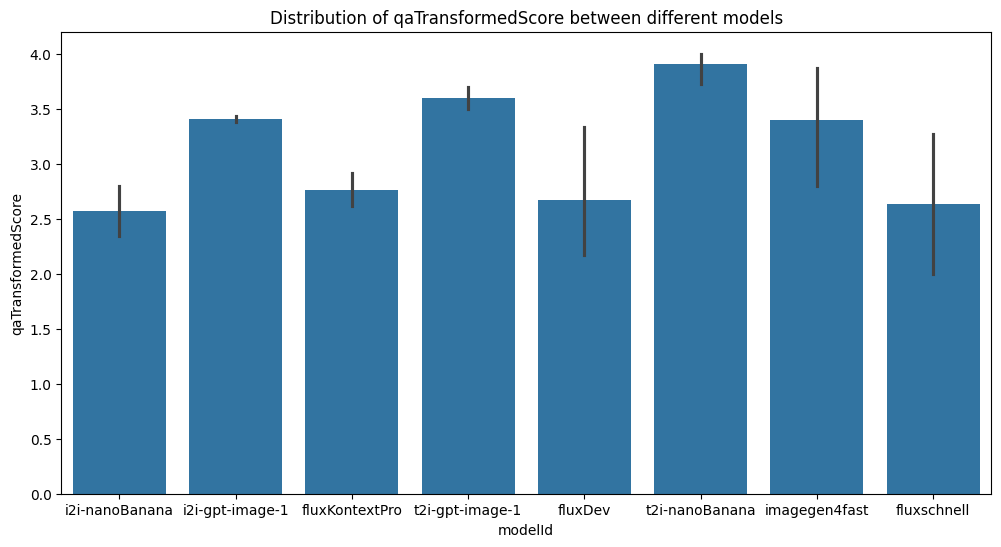

In [27]:
# Distribution of qaTransformedScore by modelId
plt.figure(figsize=(12, 6))
sns.barplot(data=workdf, x='modelId', y='qaTransformedScore').set_title("Distribution of qaTransformedScore between different models")

<Axes: xlabel='prompt_length_bin', ylabel='qaTransformedScore'>

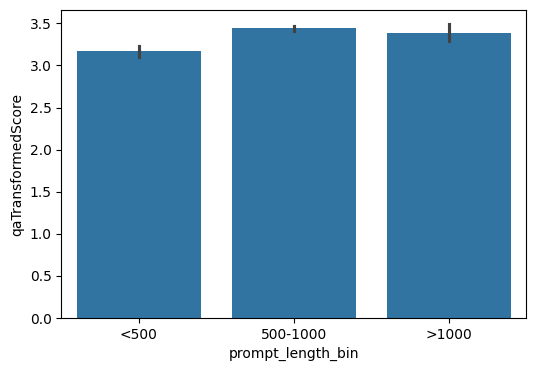

In [28]:
# Distribution of qaTransformedScore by prompt_length_bin
plt.figure(figsize=(6, 4))
sns.barplot(data=workdf, x='prompt_length_bin', y='qaTransformedScore')

<Axes: xlabel='modelId', ylabel='qaTransformedScore'>

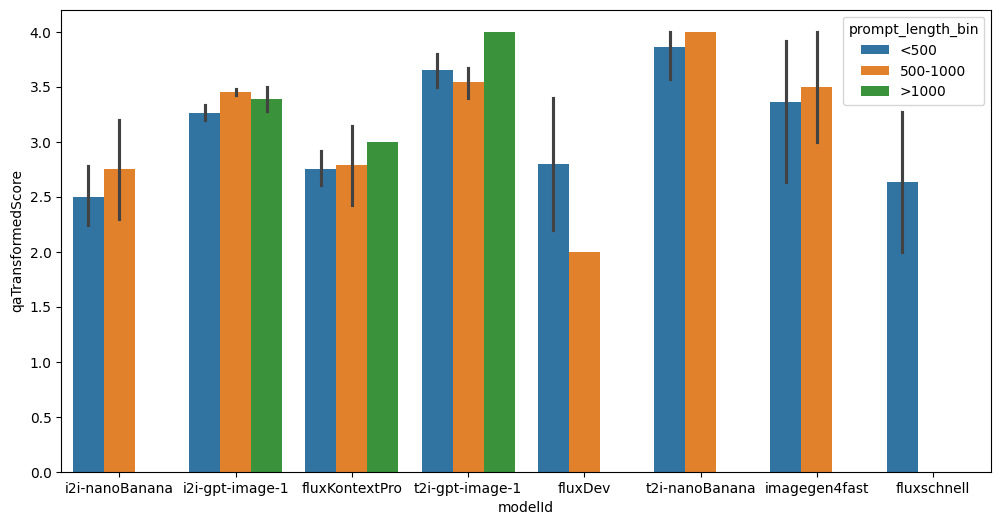

In [29]:
# Distribution of qaTransformedScore by modelId and prompt_length_bin
plt.figure(figsize=(12, 6))
sns.barplot(data=workdf, x='modelId', y='qaTransformedScore', hue='prompt_length_bin')

### Embedding features
Create embeddings from user prompts using different embedding models:
- **all-minilm** (22M params) → 384-dim embeddings -> **model max length 512**
- **nomic-embed-text:v1.5** (137M params) → 768-dim embeddings -> **model max length 8192**

In [30]:
# Create embeddings for training dataset into numpy arrays. Default context length is 8192.
X_embed_nomic = workdf['prompt'].apply(lambda x: ollama.embeddings(model="nomic-embed-text:v1.5", prompt=x).embedding).to_numpy()
# Stack embeddings into a 2D array for model training
X_embed_nomic = np.vstack(X_embed_nomic)

# Create embeddings for training dataset into numpy arrays. Default context length increased to 512 from 256.
X_embed_all_minilm = workdf['prompt'].apply(lambda x: ollama.embeddings(model="all-minilm", prompt=x, options={"num_ctx":512}).embedding).to_numpy()
# Stack embeddings into a 2D array for model training
X_embed_all_minilm = np.vstack(X_embed_all_minilm)

### Feature engineering

Prepare numerical and categorical features for model training:

- **Prompt length**: extracted from `prompt_length` and scaled to `[0, 1]` using MinMax scaling
- **Model ID**: categorical `modelId` feature encoded using one-hot encoding
- **Target variable**: binary label derived from `qaTransformedScore`  
  - `1` if score ≤ 2.0  
  - `0` otherwise

In [31]:
# Create prompt length feature as numpy array. It should be scaled between 0 and 1.
scaler = MinMaxScaler()
X_prompt_length = workdf['prompt_length'].to_numpy()
X_prompt_length = scaler.fit_transform(X_prompt_length.reshape(-1, 1))

# Create one hot encoding for modelId as numpy array
encoder = OneHotEncoder()
X_modelId = encoder.fit_transform(workdf[['modelId']])
X_modelId = X_modelId.toarray()

# Create binary target variable based on qaTransformedScore as numpy array
y = workdf['qaTransformedScore'].astype(float).to_numpy()
y = np.where(y <= 2.0, 1, 0)

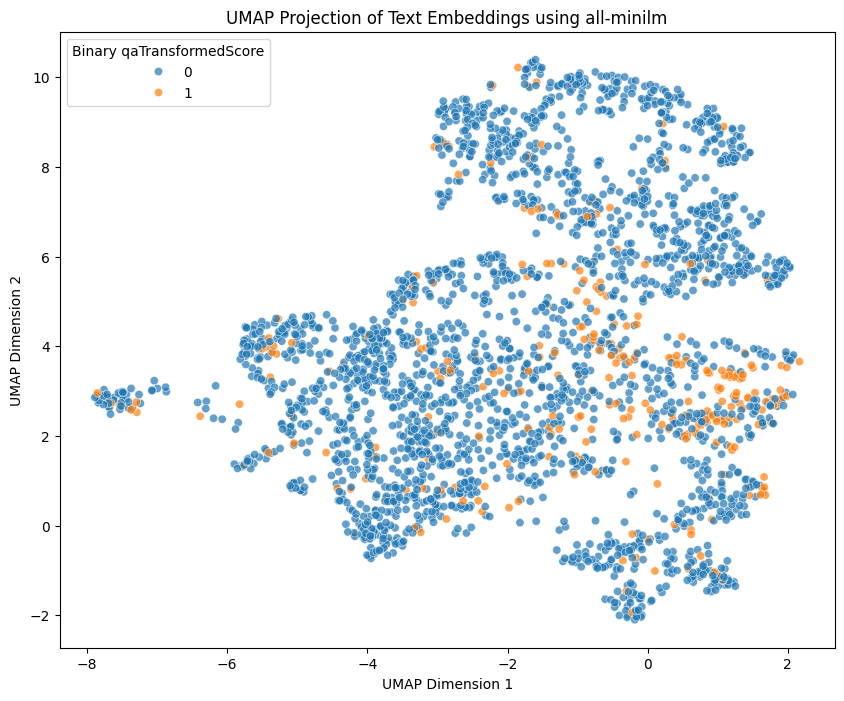

In [32]:
# Create UMAP visualization
reducer = umap.UMAP(n_neighbors=100, 
                    metric='cosine', 
                    n_components=2,
                    min_dist=0.4,
                    random_state=42)
X_all_minilm_umap = reducer.fit_transform(X_embed_all_minilm)
plot_umap(X_all_minilm_umap, y, "all-minilm")

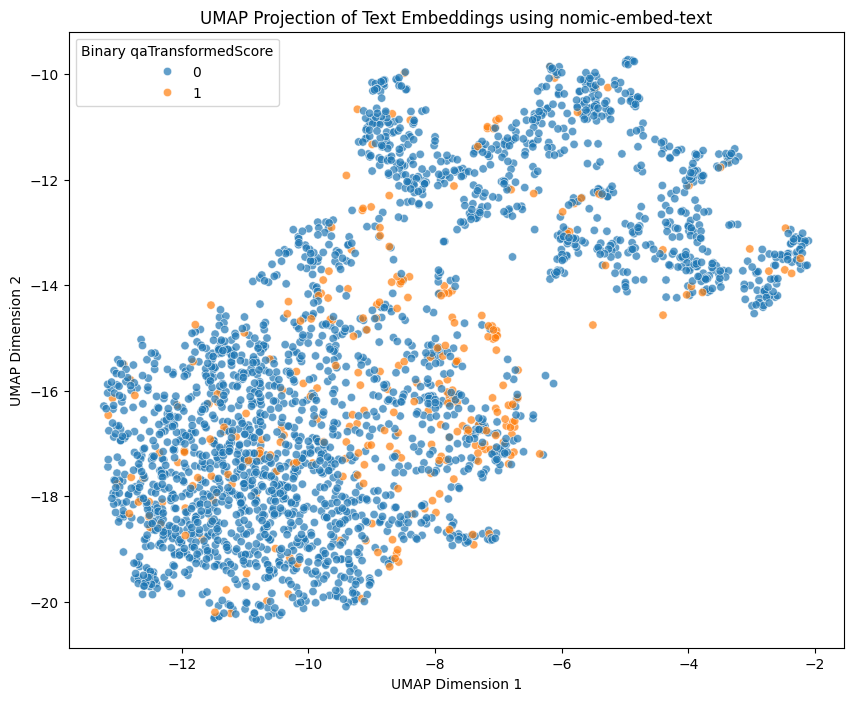

In [33]:
# Create UMAP visualization
reducer = umap.UMAP(n_neighbors=100, 
                    metric='cosine', 
                    n_components=2,
                    min_dist=0.4,
                    random_state=42)
X_nomic_umap = reducer.fit_transform(X_embed_nomic)
plot_umap(X_nomic_umap, y, "nomic-embed-text")

# Helper functions for fitting ML models

In [71]:
def initiate_model(model_type:str, params:dict=None):
    if model_type=="LogisticRegression":
        if params:
             model = LogisticRegression(**params)
        else:
            model = LogisticRegression(
                class_weight="balanced", 
                max_iter=3000
            )
    elif model_type=="GradientBoostingClassifier":
        if params:
            model = GradientBoostingClassifier(**params)
        else:
            model = GradientBoostingClassifier(
                n_estimators=100,
                learning_rate=0.05,
                max_depth=3,
                random_state=42
            )
    elif model_type=="LGBMClassifier":
            if params:
                 model = lgb.LGBMClassifier(**params)
            else:  
                model = lgb.LGBMClassifier(
                    n_estimators=500,
                    learning_rate=0.03,
                    num_leaves=31,
                    max_depth=-1,
                    subsample=0.8,
                    colsample_bytree=0.8,
                    objective="binary",
                    metric="aucpr",
                    is_unbalance=True,
                    random_state=42,
                    verbosity=-1
                )
    else:
         raise ValueError("Wrong model type")
    return model

def train_evaluate(model_type:str, k_fold_splits:int, random_state:int, X:np.array, model_params:dict=None):

    skf = StratifiedKFold(n_splits=k_fold_splits, shuffle=True, random_state=random_state)

    accs = []
    roc_aucs = []
    pr_aucs = []
    f1s = []
    recalls = []
    conf_matrices = []
    best_thresholds = []

    for train_idx, val_idx in skf.split(X, y):
        X_train, X_val = X[train_idx], X[val_idx]
        y_train, y_val = y[train_idx], y[val_idx]

        model = initiate_model(model_type)

        model.fit(X_train, y_train)

        y_prob = model.predict_proba(X_val)[:, 1]

        precision, recall, thresholds = precision_recall_curve(y_val, y_prob)

        f1_scores = 2 * (precision * recall) / (precision + recall + 1e-8)
        best_threshold = thresholds[np.argmax(f1_scores)]

        y_pred = (y_prob >= best_threshold).astype(int)

        accs.append(accuracy_score(y_val, y_pred))
        roc_aucs.append(roc_auc_score(y_val, y_prob))
        pr_aucs.append(average_precision_score(y_val, y_prob, average="macro"))
        f1s.append(f1_score(y_val, y_pred))
        recalls.append(recall_score(y_val, y_pred))
        conf_matrices.append(confusion_matrix(y_val, y_pred))
        best_thresholds.append(best_threshold)

    print(f"Accuracy: {np.mean(accs):.4f}")
    print(f"ROC-AUC: {np.mean(roc_aucs):.4f}")
    print(f"PR-AUC : {np.mean(pr_aucs):.4f}")
    print(f"F1     : {np.mean(f1s):.4f}")
    print(f"Recall : {np.mean(recalls):.4f}")
    print(f"Best Thresholds: {np.mean(best_thresholds):.4f}")
    print("\nAverage Confusion Matrix (across folds):")
    print(np.mean(conf_matrices, axis=0).astype(int))
    print("[['TN', 'FP'],\n['FN', 'TP']]")

    return accs, roc_aucs, pr_aucs, f1s, recalls, conf_matrices, best_thresholds

# K-Fold Logistic Regression using all-minilm embeddings

In [72]:
X = X_embed_all_minilm

accs, roc_aucs, pr_aucs, f1s, recalls, conf_matrices, best_thresholds = train_evaluate(
    model_type="LogisticRegression", 
    k_fold_splits=5,
    random_state=42, 
    X=X)

Accuracy: 0.8532
ROC-AUC: 0.7867
PR-AUC : 0.3825
F1     : 0.4408
Recall : 0.5275
Best Thresholds: 0.6451

Average Confusion Matrix (across folds):
[[424  50]
 [ 27  31]]
[['TN', 'FP'],
['FN', 'TP']]


# K-Fold Logistic Regression using nomic embeddings

In [64]:
X = X_embed_nomic

accs, roc_aucs, pr_aucs, f1s, recalls, conf_matrices, best_thresholds = train_evaluate(
    model_type="LogisticRegression", 
    k_fold_splits=5,
    random_state=42, 
    X=X)

Accuracy: 0.8614
ROC-AUC: 0.7028
PR-AUC : 0.2983
F1     : 0.3950
Recall : 0.4081
Best Thresholds: 0.7772

Average Confusion Matrix (across folds):
[[436  39]
 [ 34  24]]
[['TN', 'FP'],
['FN', 'TP']]


# K-Fold Logistic Regression using all-minilm embeddings and modelId

In [65]:
X = np.concatenate([X_embed_all_minilm, X_modelId], axis=1)

accs, roc_aucs, pr_aucs, f1s, recalls, conf_matrices, best_thresholds = train_evaluate(
    model_type="LogisticRegression", 
    k_fold_splits=5,
    random_state=42, 
    X=X)

Accuracy: 0.8914
ROC-AUC: 0.7947
PR-AUC : 0.4257
F1     : 0.4699
Recall : 0.4387
Best Thresholds: 0.7573

Average Confusion Matrix (across folds):
[[450  25]
 [ 33  25]]
[['TN', 'FP'],
['FN', 'TP']]


# K-Fold Logistic Regression using all-minilm embeddings and modelId. SMOTE used for sampling of the bad prompts class

In [37]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

X = np.concatenate([X_embed_all_minilm, X_modelId], axis=1)

accs = []
roc_aucs = []
pr_aucs = []
f1s = []
recalls = []
conf_matrices = []
best_thresholds = []

for train_idx, val_idx in skf.split(X, y):
    X_train, X_val = X[train_idx], X[val_idx]
    y_train, y_val = y[train_idx], y[val_idx]

    pipeline = Pipeline([
        ("smote", SMOTE(random_state=42)),
        ("model", LogisticRegression(max_iter=3000))
    ])

    pipeline.fit(X_train, y_train)

    y_prob = pipeline.predict_proba(X_val)[:, 1]

    precision, recall, thresholds = precision_recall_curve(y_val, y_prob)

    f1_scores = 2 * (precision * recall) / (precision + recall + 1e-8)
    best_threshold = thresholds[np.argmax(f1_scores)]

    y_pred = (y_prob >= best_threshold).astype(int)

    accs.append(accuracy_score(y_val, y_pred))
    roc_aucs.append(roc_auc_score(y_val, y_prob))
    pr_aucs.append(average_precision_score(y_val, y_prob, average="macro"))
    f1s.append(f1_score(y_val, y_pred))
    recalls.append(recall_score(y_val, y_pred))
    conf_matrices.append(confusion_matrix(y_val, y_pred))
    best_thresholds.append(best_threshold)

print(f"Accuracy: {np.mean(accs):.4f}")
print(f"ROC-AUC: {np.mean(roc_aucs):.4f}")
print(f"PR-AUC : {np.mean(pr_aucs):.4f}")
print(f"F1     : {np.mean(f1s):.4f}")
print(f"Recall : {np.mean(recalls):.4f}")
print(f"Best Thresholds: {np.mean(best_thresholds):.4f}")
print("\nAverage Confusion Matrix (across folds):")
print(np.mean(conf_matrices, axis=0).astype(int))
print("[['TN', 'FP'],\n['FN', 'TP']]")


Accuracy: 0.8873
ROC-AUC: 0.7743
PR-AUC : 0.4113
F1     : 0.4615
Recall : 0.4424
Best Thresholds: 0.7274

Average Confusion Matrix (across folds):
[[447  27]
 [ 32  26]]
[['TN', 'FP'],
['FN', 'TP']]


# K-Fold Gradient Boosting using all-minilm embeddings and modelId

In [66]:
X = np.concatenate([X_embed_all_minilm, X_modelId], axis=1)

accs, roc_aucs, pr_aucs, f1s, recalls, conf_matrices, best_thresholds = train_evaluate(
    model_type="GradientBoostingClassifier", 
    k_fold_splits=5,
    random_state=42, 
    X=X)

Accuracy: 0.8622
ROC-AUC: 0.7873
PR-AUC : 0.4133
F1     : 0.4468
Recall : 0.5032
Best Thresholds: 0.1907

Average Confusion Matrix (across folds):
[[430  44]
 [ 29  29]]
[['TN', 'FP'],
['FN', 'TP']]


# K-Fold LightGBM using all-minilm embeddings and modelId

In [67]:
X = np.concatenate([X_embed_all_minilm, X_modelId], axis=1)

accs, roc_aucs, pr_aucs, f1s, recalls, conf_matrices, best_thresholds = train_evaluate(
    model_type="LGBMClassifier", 
    k_fold_splits=5,
    random_state=42, 
    X=X)

Accuracy: 0.8801
ROC-AUC: 0.8136
PR-AUC : 0.4879
F1     : 0.5042
Recall : 0.5476
Best Thresholds: 0.1202

Average Confusion Matrix (across folds):
[[437  37]
 [ 26  32]]
[['TN', 'FP'],
['FN', 'TP']]


# Hyper-parameter tuning for LightGBM

In [40]:
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

X = np.concatenate([X_embed_all_minilm, X_modelId], axis=1)

def objective(trial):
    params = {
        "objective": "binary",
        "metric": "aucpr",
        "is_unbalance": True,
        "boosting_type": "gbdt",
        "num_leaves": trial.suggest_int("num_leaves", 15, 128),
        "max_depth": -1, #trial.suggest_int("max_depth", 3, 15),
        "learning_rate": trial.suggest_float("learning_rate", 0.01, 0.1),
        "reg_alpha": trial.suggest_float("reg_alpha", 0.0, 2.0),
        "reg_lambda": trial.suggest_float("reg_lambda", 0.0, 2.0),
        "subsample": trial.suggest_float("subsample", 0.6, 1.0),
        "colsample_bytree": trial.suggest_float("colsample_bytree", 0.6, 1.0),
        "n_estimators": trial.suggest_int("n_estimators", 100, 1000),
        "min_child_samples": trial.suggest_int("min_child_samples", 20, 100),
        "random_state": 42,
        "verbosity": -1
    }

    pr_aucs = []

    for train_idx, val_idx in skf.split(X, y):

        model = lgb.LGBMClassifier(**params)

        X_train, X_val = X[train_idx], X[val_idx]
        y_train, y_val = y[train_idx], y[val_idx]

        model.fit(X_train, y_train)
        
        y_prob = model.predict_proba(X_val)[:, 1]
        pr_aucs.append(roc_auc_score(y_val, y_prob))

    return np.mean(pr_aucs)

study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=50)

print("Best Precision-Recall AUC:", study.best_value)
print("Best params:", study.best_params)


[I 2025-12-31 14:58:23,721] A new study created in memory with name: no-name-e9ba588b-06e5-4aff-9aeb-e89adb7bdc75
[I 2025-12-31 14:58:35,658] Trial 0 finished with value: 0.8243457276601618 and parameters: {'num_leaves': 48, 'learning_rate': 0.012050135934475147, 'reg_alpha': 1.1835937583290999, 'reg_lambda': 0.034730658288183225, 'subsample': 0.8369831610631547, 'colsample_bytree': 0.7594577014164632, 'n_estimators': 576, 'min_child_samples': 63}. Best is trial 0 with value: 0.8243457276601618.
[I 2025-12-31 14:59:07,677] Trial 1 finished with value: 0.8264700032647714 and parameters: {'num_leaves': 93, 'learning_rate': 0.019870744556041493, 'reg_alpha': 0.5086609033054001, 'reg_lambda': 1.4629921946849815, 'subsample': 0.7052075613442297, 'colsample_bytree': 0.6954147191024836, 'n_estimators': 881, 'min_child_samples': 33}. Best is trial 1 with value: 0.8264700032647714.
[I 2025-12-31 14:59:16,965] Trial 2 finished with value: 0.8213900592751173 and parameters: {'num_leaves': 80, 'le

Best Precision-Recall AUC: 0.8294316224259551
Best params: {'num_leaves': 108, 'learning_rate': 0.0497930248716231, 'reg_alpha': 1.1794753698163412, 'reg_lambda': 1.3300548035999615, 'subsample': 0.6403391663458576, 'colsample_bytree': 0.621882960899806, 'n_estimators': 676, 'min_child_samples': 26}


# Fit LightGBM with best parameters

In [ ]:
X = np.concatenate([X_embed_all_minilm, X_modelId], axis=1)

accs, roc_aucs, pr_aucs, f1s, recalls, conf_matrices, best_thresholds = train_evaluate(
    model_type="LGBMClassifier", 
    k_fold_splits=5,
    random_state=42, 
    X=X,
    model_params=study.best_params)

Accuracy: 0.8801
ROC-AUC: 0.8136
PR-AUC : 0.4879
F1     : 0.5042
Recall : 0.5476
Best Thresholds: 0.1202

Average Confusion Matrix (across folds):
[[437  37]
 [ 26  32]]
[['TN', 'FP'],
['FN', 'TP']]


# Train LightGBM using the complete dataset and save it for production
- Use the initial parameters of LightGBM as resulted in better results

In [76]:
X = np.concatenate([X_embed_all_minilm, X_modelId], axis=1)

model = initiate_model(model_type="LGBMClassifier")

model.fit(X_train, y_train)

,boosting_type,'gbdt'
,num_leaves,31
,max_depth,-1
,learning_rate,0.03
,n_estimators,500
,subsample_for_bin,200000
,objective,'binary'
,class_weight,None
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,20


In [75]:
y_prob = model.predict_proba(X)[:, 1]
precision, recall, thresholds = precision_recall_curve(y, y_prob)

f1_scores = 2 * (precision * recall) / (precision + recall + 1e-8)
best_threshold = thresholds[np.argmax(f1_scores)]

print(f"Best Threshold on full data: {best_threshold:.4f}")

Best Threshold on full data: 0.8596


In [44]:
joblib.dump(model, 'app/trained_models/lgbm_prompt_risk_model.pkl')

['app/trained_models/lgbm_prompt_risk_model.pkl']

# Export OneHotEncoder model

In [45]:
joblib.dump(encoder, 'app/trained_models/modelId_encoder.pkl')

['app/trained_models/modelId_encoder.pkl']

In [46]:
encoder

,"categories categories: 'auto' or a list of array-like, default='auto'Categories (unique values) per feature:- 'auto' : Determine categories automatically from the training data.- list : ``categories[i]`` holds the categories expected in the ith column. The passed categories should not mix strings and numeric values within a single feature, and should be sorted in case of numeric values.The used categories can be found in the ``categories_`` attribute... versionadded:: 0.20",'auto'
,"drop drop: {'first', 'if_binary'} or an array-like of shape (n_features,), default=NoneSpecifies a methodology to use to drop one of the categories perfeature. This is useful in situations where perfectly collinearfeatures cause problems, such as when feeding the resulting datainto an unregularized linear regression model.However, dropping one category breaks the symmetry of the originalrepresentation and can therefore induce a bias in downstream models,for instance for penalized linear classification or regression models.- None : retain all features (the default).- 'first' : drop the first category in each feature. If only one category is present, the feature will be dropped entirely.- 'if_binary' : drop the first category in each feature with two categories. Features with 1 or more than 2 categories are left intact.- array : ``drop[i]`` is the category in feature ``X[:, i]`` that should be dropped.When `max_categories` or `min_frequency` is configured to groupinfrequent categories, the dropping behavior is handled after thegrouping... versionadded:: 0.21 The parameter `drop` was added in 0.21... versionchanged:: 0.23 The option `drop='if_binary'` was added in 0.23... versionchanged:: 1.1 Support for dropping infrequent categories.",None
,"sparse_output sparse_output: bool, default=TrueWhen ``True``, it returns a :class:`scipy.sparse.csr_matrix`,i.e. a sparse matrix in ""Compressed Sparse Row"" (CSR) format... versionadded:: 1.2 `sparse` was renamed to `sparse_output`",True
,"dtype dtype: number type, default=np.float64Desired dtype of output.",<class 'numpy.float64'>
,"handle_unknown handle_unknown: {'error', 'ignore', 'infrequent_if_exist', 'warn'}, default='error'Specifies the way unknown categories are handled during :meth:`transform`.- 'error' : Raise an error if an unknown category is present during transform.- 'ignore' : When an unknown category is encountered during transform, the resulting one-hot encoded columns for this feature will be all zeros. In the inverse transform, an unknown category will be denoted as None.- 'infrequent_if_exist' : When an unknown category is encountered during transform, the resulting one-hot encoded columns for this feature will map to the infrequent category if it exists. The infrequent category will be mapped to the last position in the encoding. During inverse transform, an unknown category will be mapped to the category denoted `'infrequent'` if it exists. If the `'infrequent'` category does not exist, then :meth:`transform` and :meth:`inverse_transform` will handle an unknown category as with `handle_unknown='ignore'`. Infrequent categories exist based on `min_frequency` and `max_categories`. Read more in the :ref:`User Guide `.- 'warn' : When an unknown category is encountered during transform a warning is issued, and the encoding then proceeds as described for `handle_unknown=""infrequent_if_exist""`... versionchanged:: 1.1 `'infrequent_if_exist'` was added to automatically handle unknown categories and infrequent categories... versionadded:: 1.6 The option `""warn""` was added in 1.6.",'error'
,"min_frequency min_frequency: int or float, default=NoneSpecifies the minimum frequency below which a category will beconsidered infrequent.- If `int`, categories with a smaller cardinality will be considered infrequent.- If `float`, categories with a smaller cardinality than `min_frequency * n_samples` will be considered infrequent... versionadded:: 1.1 Read more in the :ref:`User Guide `.",None
,"max_catego

# Explainability - Interpretability

In [47]:
# Prediction pipeline
def predict_pipeline(texts):

    all_embeddings = []
    
    for text in texts:

        modelId = "i2i-gpt-image-1"

        text_features = ollama.embeddings(
            model="all-minilm", 
            prompt=text, 
            options={"num_ctx": 512}
        ).embedding
        text_features = np.array(text_features).reshape(1, -1)

        # Create modelId features
        modelId_features = np.array([modelId]).reshape(1, -1)
        modelId_features = encoder.transform(modelId_features)
        modelId_features = modelId_features.toarray()

        features = np.concatenate([text_features, modelId_features], axis=1)

        all_embeddings.append(features)
    
    # Convert list of lists to a 2D numpy array (samples, embedding_dim)
    X = np.vstack(all_embeddings)
    
    # LightGBM returns probabilities for [Class 0, Class 1]
    return model.predict_proba(X)

# 2. Initialize the Explainer
explainer = LimeTextExplainer()

In [48]:
index = 296
bad_prompt = workdf[workdf.qaTransformedScore==1]["prompt"][index]
print(bad_prompt)

Render Adam(Image 1) as normal in Image 2. Maintain the same visual composition of Image 2. 


In [49]:
exp = explainer.explain_instance(
    text_instance=bad_prompt,
    classifier_fn=predict_pipeline, 
    num_features=10,
    num_samples=5000
)

In [50]:
# 4. Visualize the result
exp.save_to_file('explanations/bad_prompt_lime_explanation.html')

In [51]:
index = 62
good_prompt = workdf[workdf.qaTransformedScore==4]["prompt"][index]
print(good_prompt)

In a bright living room during the day, from the perspective just behind the ear of the cartoon golden dog character, frame the black cat character lounging on the couch. In the deep background, the golden dog character is visible rushing past quickly from left to right, not duplicated in the foreground. Composition is cinematic, only showing what would be visible in this exact over-the-shoulder perspective—foreground defined by the blurred or in-focus silhouette of the dog’s ear, with clear focus on the relaxed cat’s attitude. No text or borders.


In [52]:
exp = explainer.explain_instance(
    text_instance=good_prompt,
    classifier_fn=predict_pipeline, 
    num_features=10,
    num_samples=5000
)

In [53]:
exp.save_to_file('explanations/good_prompt_lime_explanation.html')